# OBJECTIVE

You have to build a model that can predict whether the loan of the applicant will be
approved or not on the basis of the details provided in the dataset.

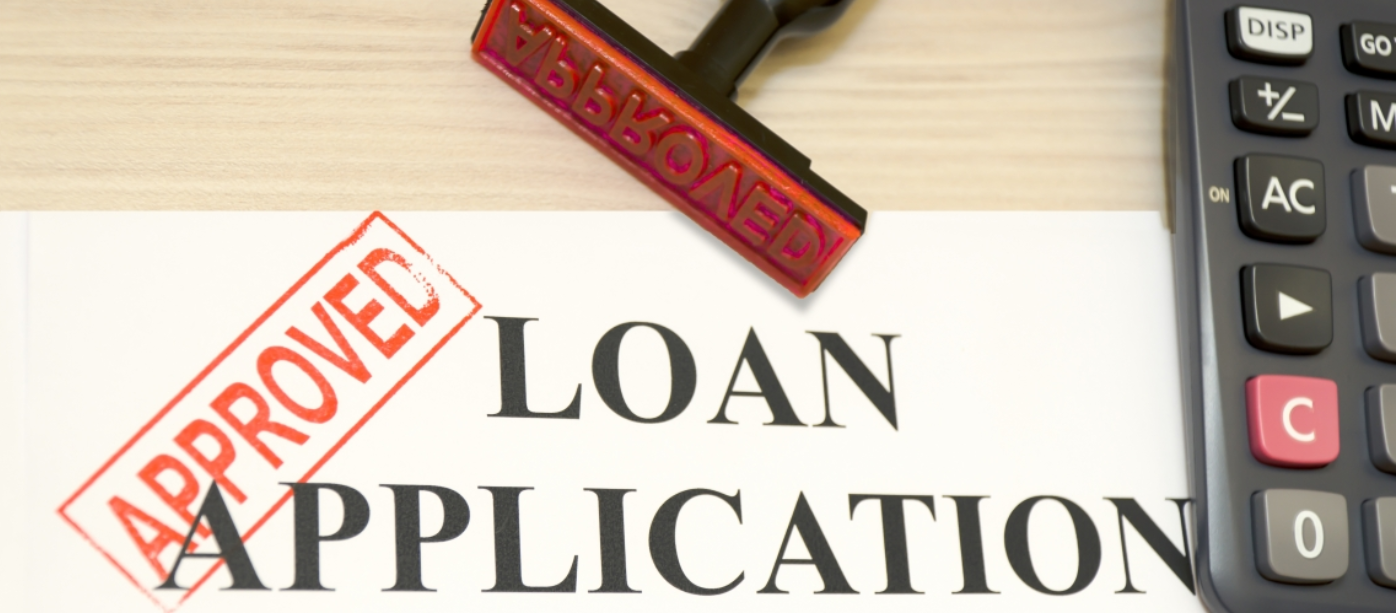

# Project Motivation

Small business loan approval percentages at big banks ($10 billion+ in assets) climbed slightly from 13.5% in May to 13.6% and small banks’ approvals rose from 18.7% in May to 18.9%, in June 2021, according to the latest Biz2Credit Small Business Lending Index. 

The pandemic opened up opportunities for many banks. Many smaller banks that had not fully automated their small business loan application procedure are now heading in that direction. Banks that participated in the government’s Paycheck Protection Program (PPP) lending to help small businesses survive the pandemic often gained these small businesses as customers, and now that the PPP is over, they may again be able to help them by providing traditional term loans and SBA loans.

The GDP growth and the development of the country cannot be seen without Loan approval for the customers. Hence by understanding the loans that will be approved by the banks, the government can find other means to provide the boost for development for MSME sector and other sectors of the economy

In [48]:
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

#SCORE CHECKERS-Classifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

#Model building libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#EDA libraries
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform

#Hyperparametertuning libraries
from sklearn.model_selection import GridSearchCV

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")


#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#Library for saving data
import pickle

In [2]:
df=pd.read_csv('loan_prediction.csv')
#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are 13 columns

# Statistical data analysis

In [4]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001325,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


Observations:

1.There are 614 datas and some have null values

2.5 continous datas and rest 8 categorical

3.All numerical datas shows large variation between mean and median showing presence of outliers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


labels count: 
  Y    422
N    192
Name: Loan_Status, dtype: int64


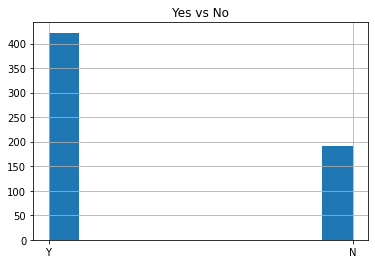

In [6]:
# checking for class imbalance
print("labels count: \n ",df["Loan_Status"].value_counts())

df["Loan_Status"].hist(grid=True)
plt.title("Yes vs No")
plt.show()


Data is imbalanced which needs to be balanced

# Graphical data analysis

**1.Analysing the relationship between categorical features and the label**

In [7]:
#finding categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
categorical_columns=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']

--------- Gender vs Loan_Status---------------------------------------------------------------------------------


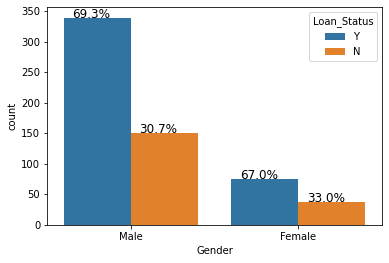

<Figure size 1080x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

--------- Married vs Loan_Status---------------------------------------------------------------------------------


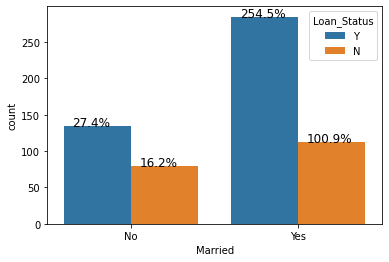

<Figure size 1080x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

--------- Dependents vs Loan_Status---------------------------------------------------------------------------------


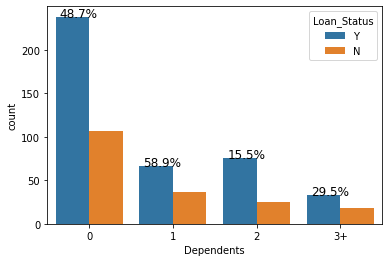

<Figure size 1080x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

--------- Education vs Loan_Status---------------------------------------------------------------------------------


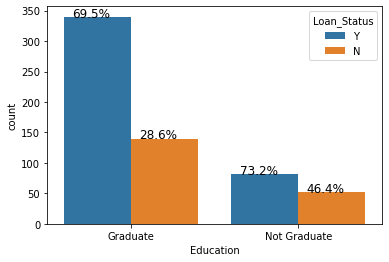

<Figure size 1080x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

--------- Self_Employed vs Loan_Status---------------------------------------------------------------------------------


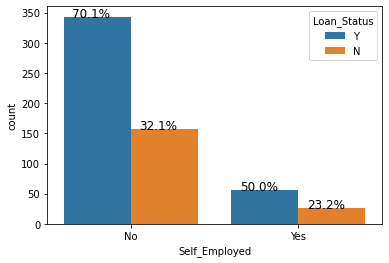

<Figure size 1080x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

--------- Property_Area vs Loan_Status---------------------------------------------------------------------------------


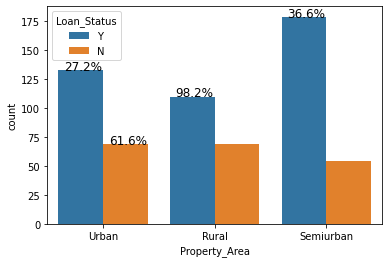

<Figure size 1080x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
for col in categorical_columns:
    print("---------",col,"vs Loan_Status---------------------------------------------------------------------------------")
    ax=sns.countplot(x=str(col), hue='Loan_Status',data = df)
    plt.figure(figsize=(15,7))
    with_hue(ax,df.Gender,2,2)
    plt.tight_layout()
    plt.show()
    

--------- Gender vs Loan_Status---------------------------------------------------------------------------------


Gender
Male      489
Female    112
Name: Gender, dtype: int64




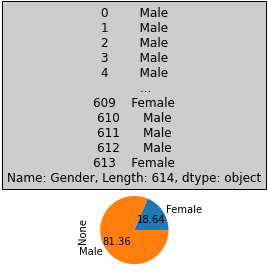

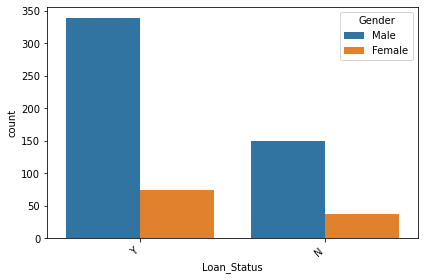



--------- Married vs Loan_Status---------------------------------------------------------------------------------


Married
Yes    398
No     213
Name: Married, dtype: int64




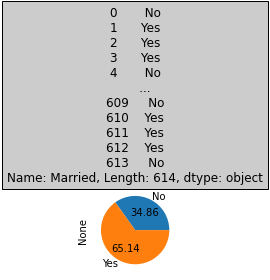

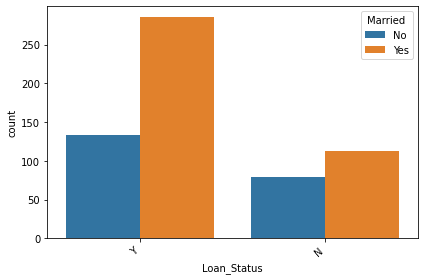



--------- Dependents vs Loan_Status---------------------------------------------------------------------------------


Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64




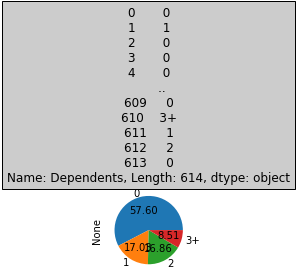

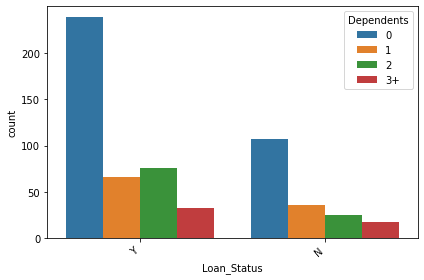



--------- Education vs Loan_Status---------------------------------------------------------------------------------


Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64




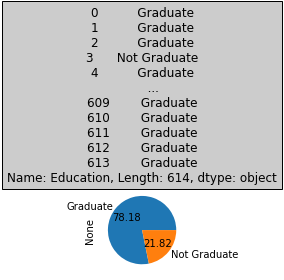

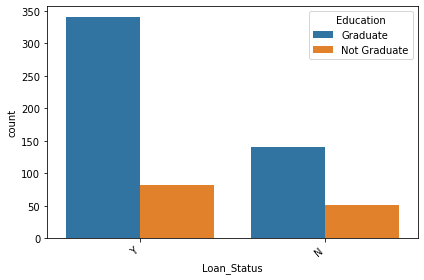



--------- Self_Employed vs Loan_Status---------------------------------------------------------------------------------


Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64




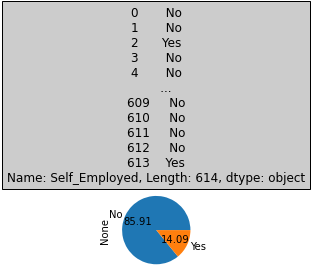

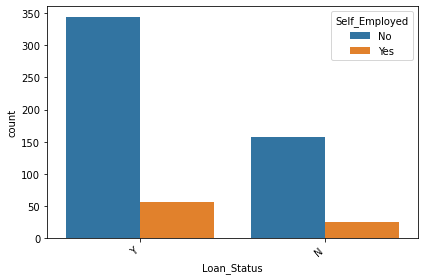



--------- Property_Area vs Loan_Status---------------------------------------------------------------------------------


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64




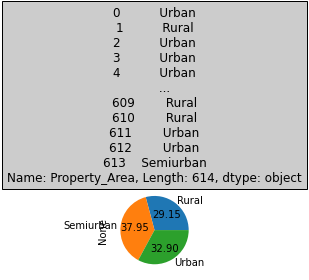

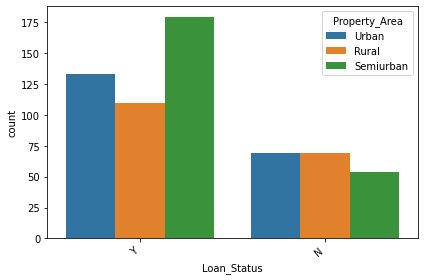

In [10]:
def relationwithlabel(x):
    print(x.value_counts())
    print("\n")
    
    df.groupby(x).size().plot(kind='pie', autopct='%.2f')
    plt.title(str(x),bbox={'facecolor':'0.8', 'pad':5})
    plt.tight_layout()
    plt.show()
    
    az=sns.countplot(x='Loan_Status',hue=x,data=df)
    az.set_xticklabels(az.get_xticklabels(), rotation = 40, ha = "right")
    plt.tight_layout()
    plt.show()
    

for column_name in categorical_columns:
    print("---------",column_name,"vs Loan_Status---------------------------------------------------------------------------------")
    print("\n")
    print(str(column_name))
    relationwithlabel(df[str(column_name)])
    print("\n")

**OBSERVATIONS**

**Gender vs Loan_Status**
1. There is 502 men and 112 women. However the loan status is equally likely for both the male and female
2. Respondents are 81% in the dataset

**Married vs Loan_Status**
1. 65% are married who have applied for the loan
2. Married have 154% higher chance to get loan approved
3. There are 401 married loan applicants and 213 and unmarried loan applicants. Amongst them the married person has a higher chance of getting the loan than the unmarried person by over 20%


**Dependents vs Loan_Status**
1. 57% respondents who applied have no dependents 
2. If no dependent there is higher chance of approval and even if there is 2 dependents there is a higher chance of approval than 1 dependent

**Education vs Loan_Status**
1. 78% of the respondents are graduates who have applied for the loan
2. Graduates have 40% higher chance of approval of loan

**Self_Employed vs Loan_Status**
1. 85% of the respondents are not self employed
2. Self or not self employed doesnt affect the loan approval much

**Property_Area vs Loan_Status**
1. 37% respondents are semi urban, 32% urban and 29% rural
2. Semiurban>urban>rural are the order for chances for loan approval

**2.Analysing the relationship between numerical features and label**

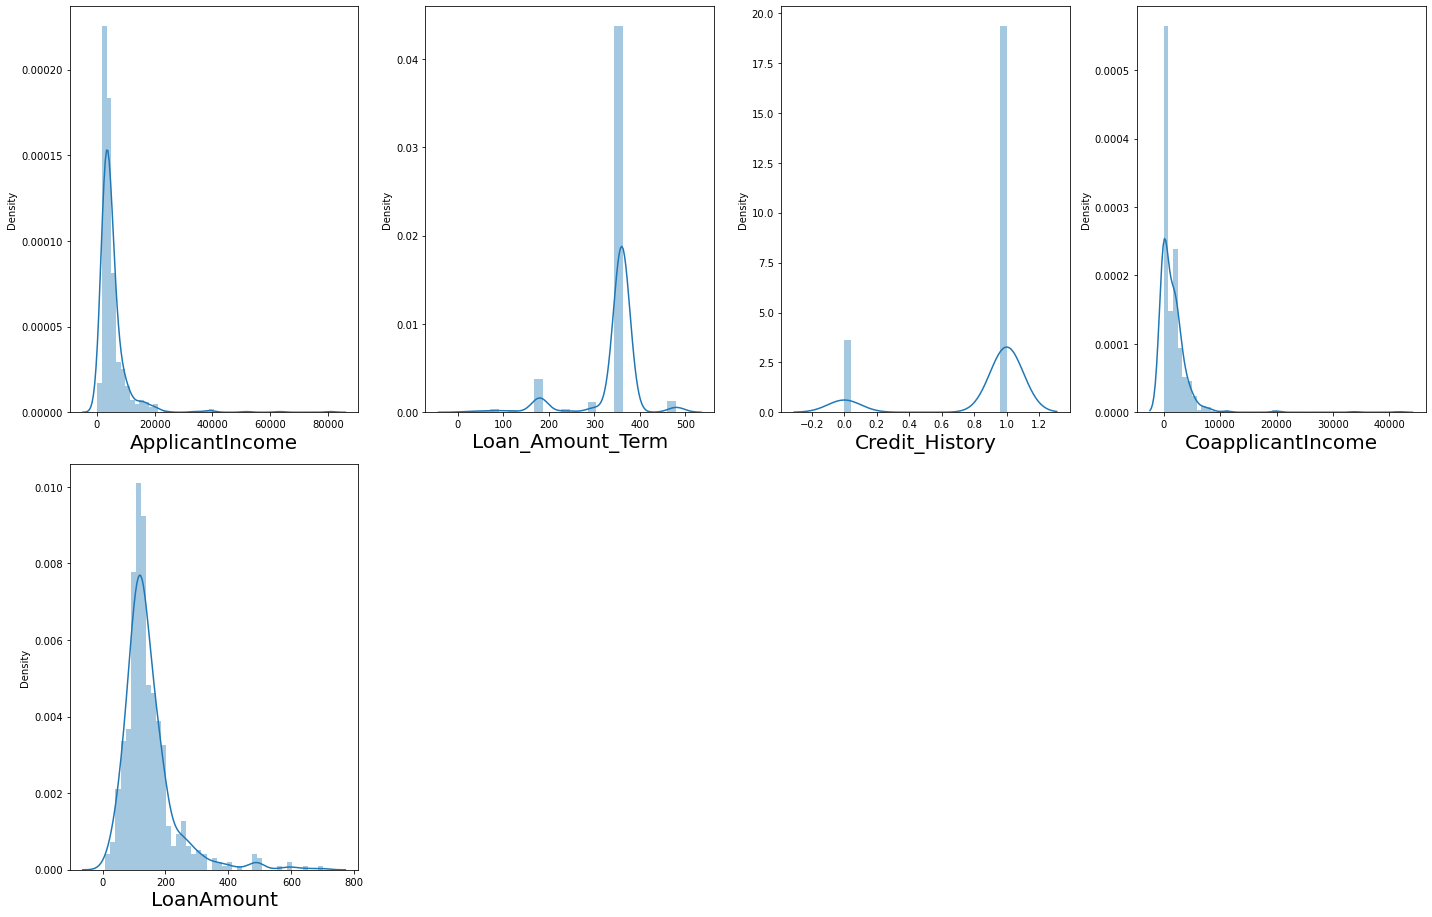

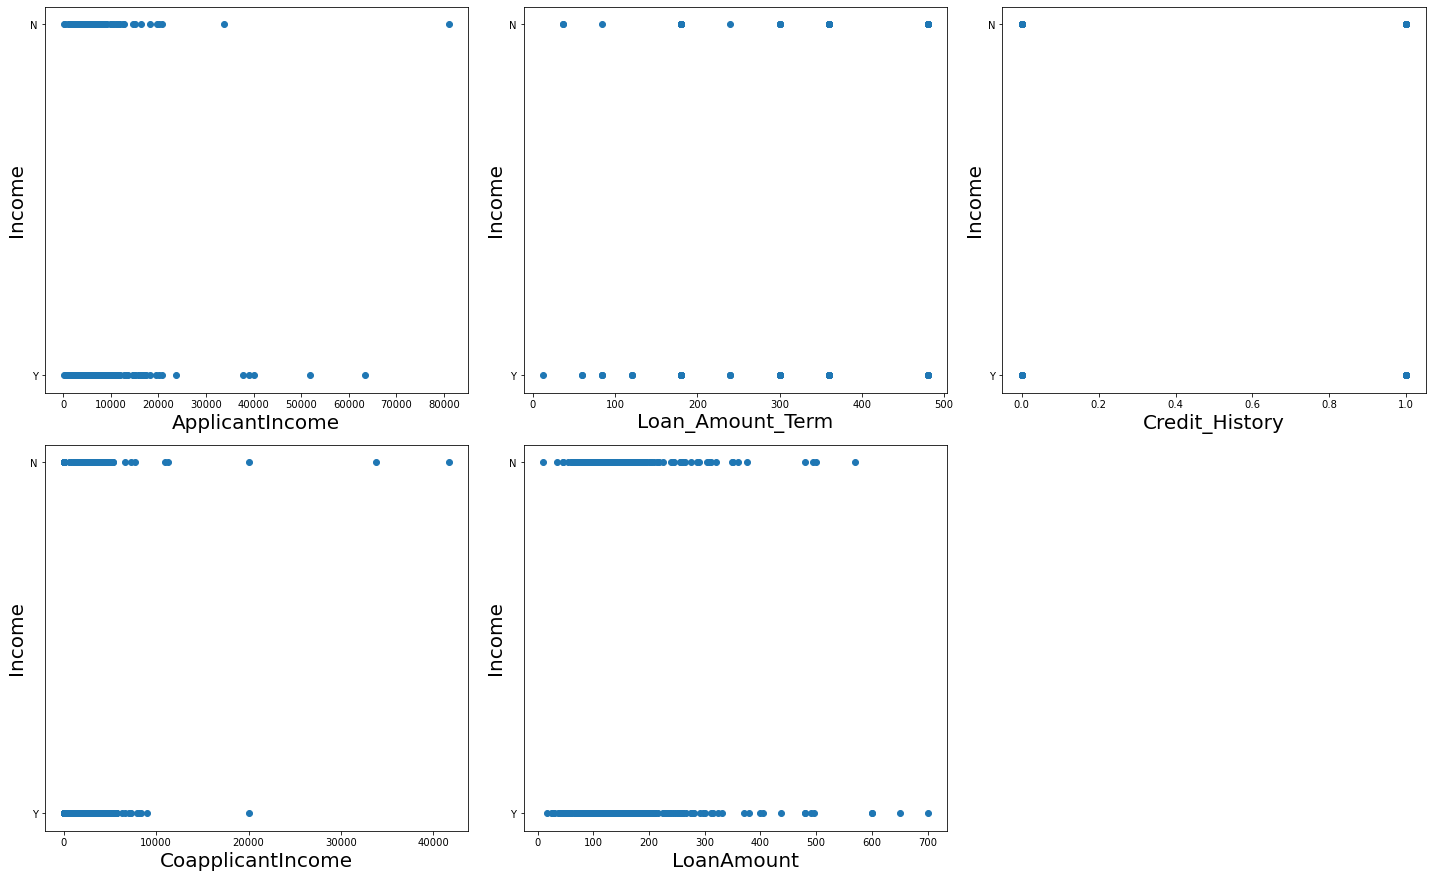

In [11]:
#numerical data
num=df[{'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'}]

#understanding numerical data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(num[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

#Analysing the relationship between numerical features and income

y_table=df['Loan_Status']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**OBSERVATION**

**Understanding Numerical features**
1. Highest coapplicant income is between 0 and 5000
2. Loan amount term is maximum at 350
3. Maximum credit history is 1
4. Applicant income is highest between 0 and 15,000
5. Loan amount is maximum at 175

**Numerical features vs Income**

1. Coapplicant income is upto rs8,000 and it is equally likely to be accepted and rejected
2. loan amount term and credit history has equal chances
3. Applicant income upto 20,000 and has equal chances
4. Loan amount upto 300 will be half the time accepted and other time not accepted.But after 300 not applied much

# EDA

**1.Duplicate values**

In [12]:
df.drop_duplicates(inplace=True)

**2.Null values**

In [13]:
#checking nan
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

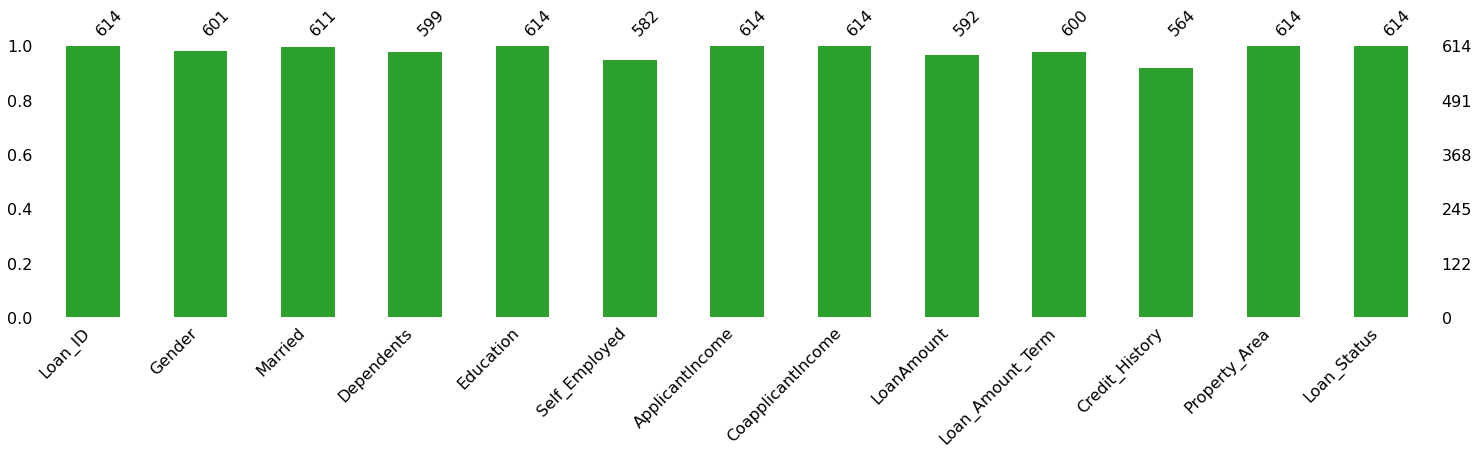

In [14]:
import missingno
missingno.bar(df, figsize = (25,5), color="tab:green")

In [15]:
#dealing with these null values by replacing it with mean

df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)

In [16]:
#Mode of columns with categorical datas
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)


In [17]:
#Checking null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**3.Outliers**

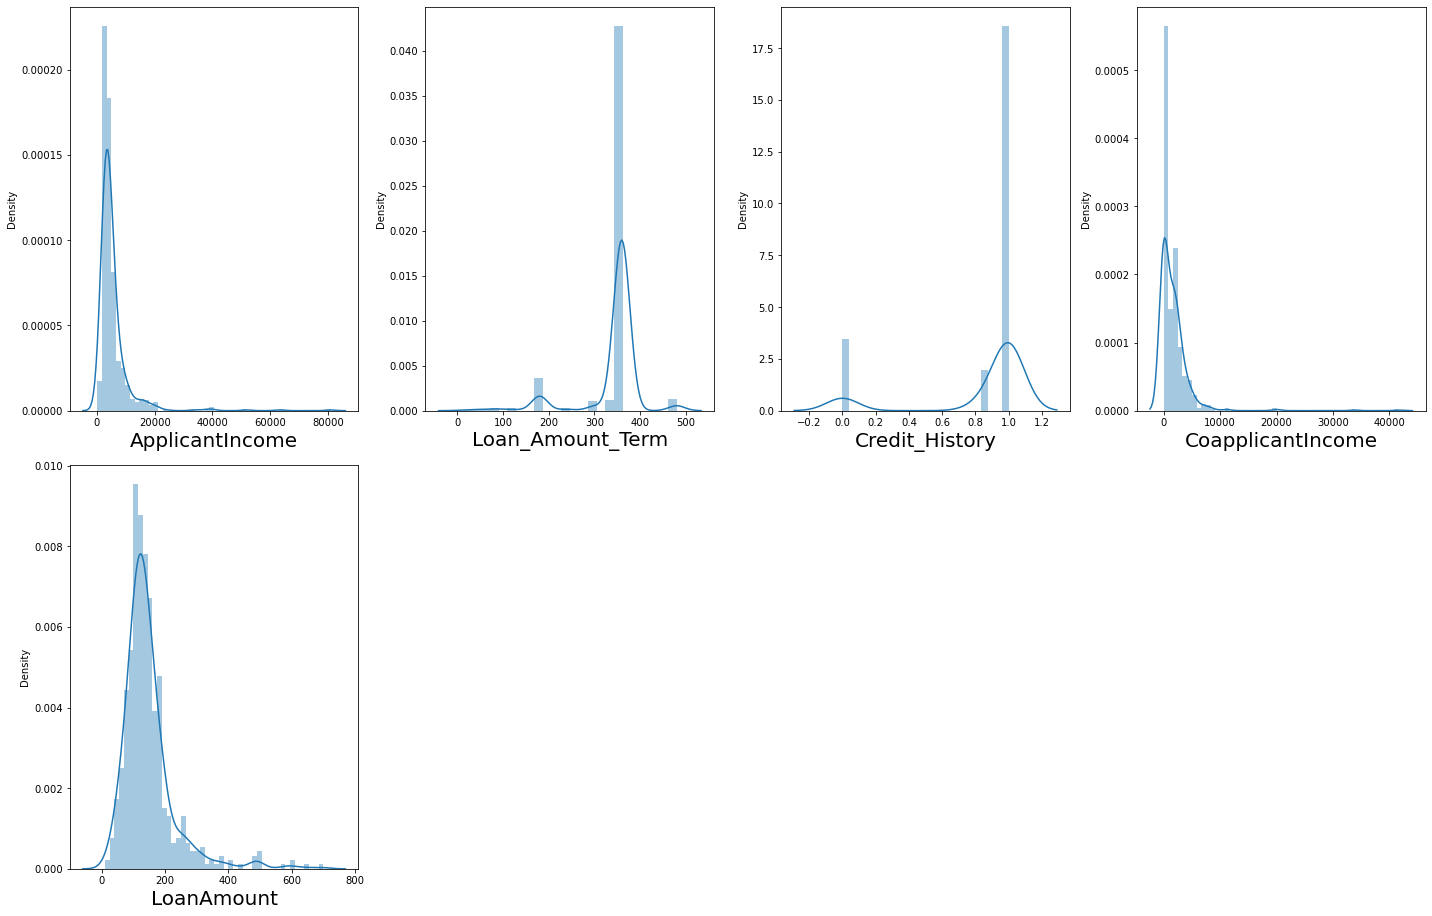

In [18]:
#numerical data
num=df[{'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'}]

#understanding numerical data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(num[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

Outliers are present in all the columns

In [19]:
#finding and reducing outliers and skewness
num=df[{'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'}]

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  614
columns after applying zscore:  577


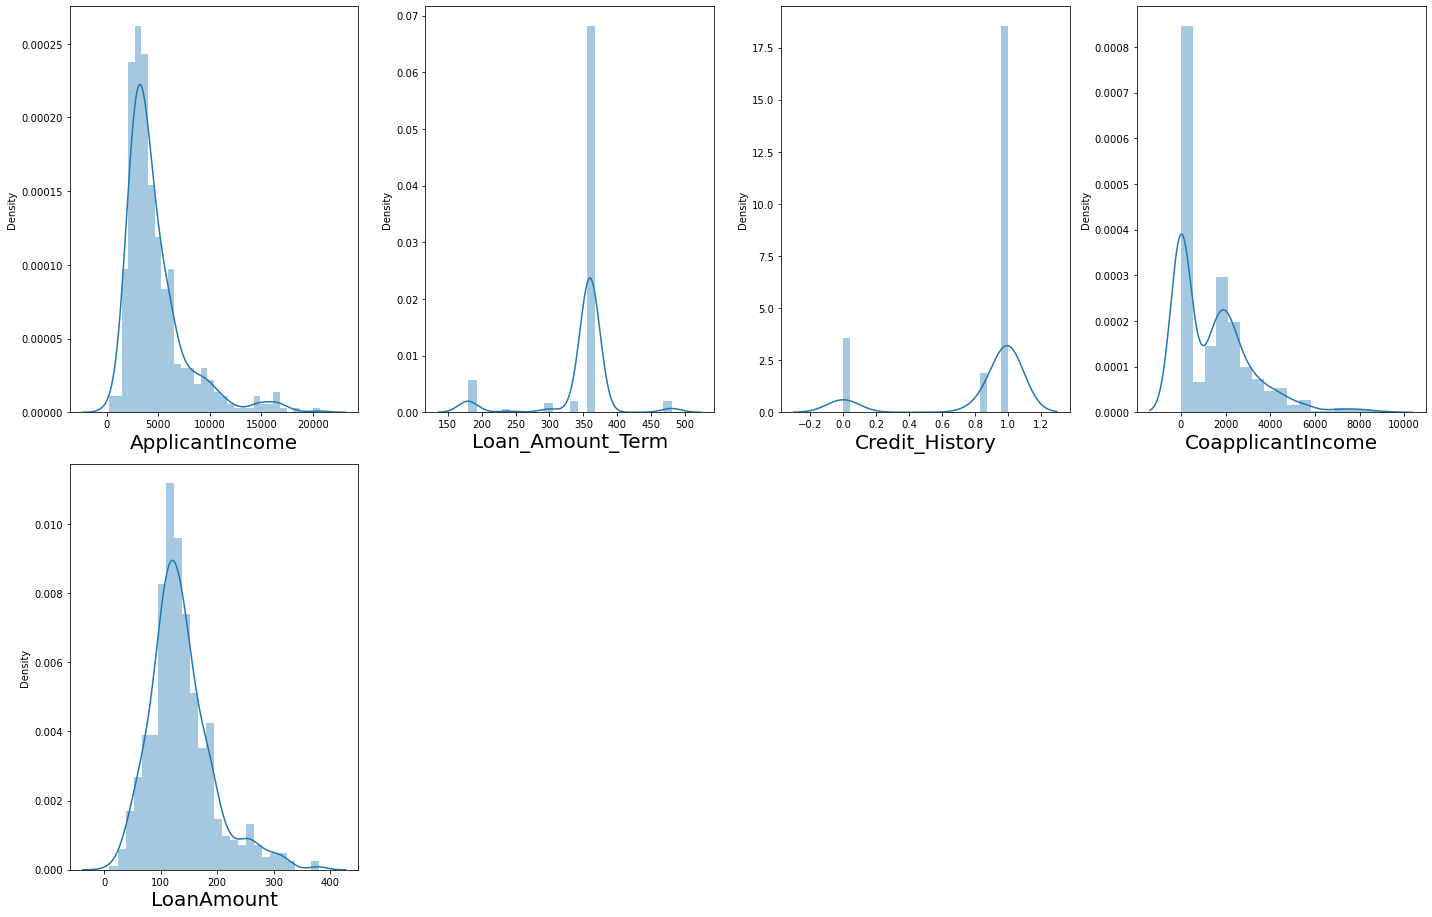

In [20]:
#checking if outliers removed
num_new=df_new[{'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'}]

#understanding numerical data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in num_new:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(num_new[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [21]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [22]:
#removing skewness using log1p
num=df[{'LoanAmount','Loan_Amount_Term', 'Credit_History'}]

for col in num:
    if num.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

Skewness has been reduced through log1p

# FEATURE ENGINEERING

**1.encoding**

In [23]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the income column
df["Loan_Status"]=lab_enc.fit_transform(df['Loan_Status'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.993232,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.859812,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.204693,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.795791,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.955827,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,4.276666,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,3.713572,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,5.537334,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,5.236442,360.0,1.0,Urban,1


Loan Status is

Y-->1

N-->0

**2.Balancing unbalanced data**

In [24]:
cat=df[{'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'}]

In [25]:
cat['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Class is imbalanced

**3.Removing unwanted columns**

In [26]:
df['Loan_ID'].value_counts()

LP001325    1
LP001086    1
LP002244    1
LP002367    1
LP002659    1
           ..
LP002862    1
LP002933    1
LP001693    1
LP002571    1
LP001478    1
Name: Loan_ID, Length: 614, dtype: int64

Since all the data is unique hence dropping the column

In [27]:
df=df.drop(columns=["Loan_ID"])

**4.Merging similar columns**

In [28]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], axis=1)

# FEATURE SELECTION

In [29]:
df.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
LoanAmount,1.000000,0.085940,-0.024909,-0.042131,0.505622
Loan_Amount_Term,0.085940,1.000000,0.001395,-0.020974,-0.069830
Credit_History,-0.024909,0.001395,1.000000,0.540483,-0.014447
Loan_Status,-0.042131,-0.020974,0.540483,1.000000,-0.031271
Total_Income,0.505622,-0.069830,-0.014447,-0.031271,1.000000


<AxesSubplot:>

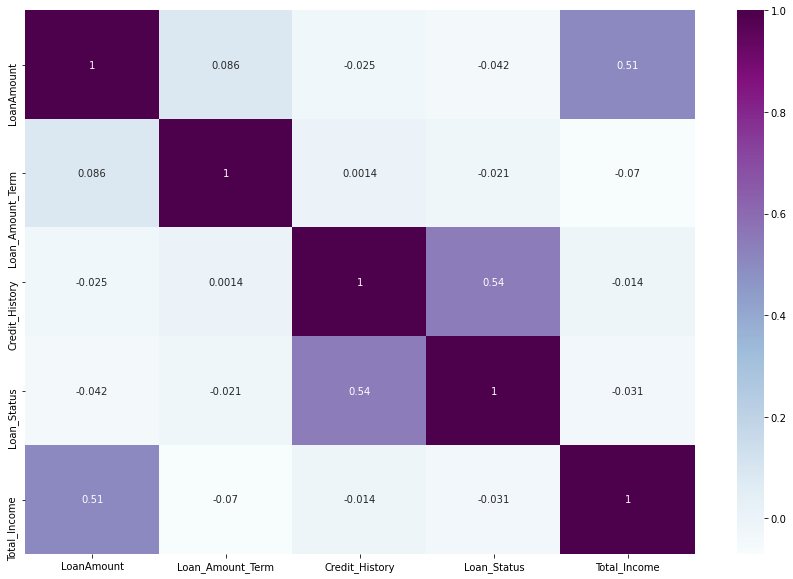

In [30]:
# Multicollinearity
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

Multicollinearity is not present to a large extent

In [31]:
#vif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(num)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=num.columns
vif

,quality,feature
0,1.000063,Credit_History
1,1.001511,Loan_Amount_Term
2,1.001569,LoanAmount


Multicollinearity is not present to a large extent

**FEATURE IMPORTANCE**

In [38]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,4.993232,360.0,1.0,Urban,NaN,5849.0
1,Male,Yes,1,Graduate,No,4.859812,360.0,1.0,Rural,LP001003,6091.0
2,Male,Yes,0,Graduate,Yes,4.204693,360.0,1.0,Urban,LP001005,3000.0
3,Male,Yes,0,Not Graduate,No,4.795791,360.0,1.0,Urban,NaN,4941.0
4,Male,No,0,Graduate,No,4.955827,360.0,1.0,Urban,NaN,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,4.276666,360.0,1.0,Rural,NaN,2900.0
610,Male,Yes,3+,Graduate,No,3.713572,180.0,1.0,Rural,NaN,4106.0
611,Male,Yes,1,Graduate,No,5.537334,360.0,1.0,Urban,NaN,8312.0
612,Male,Yes,2,Graduate,No,5.236442,360.0,1.0,Urban,NaN,7583.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       384 non-null    object 
 10  Total_Income      614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 57.6+ KB


,Importance
Features,
Credit_History,0.313
Total_Income,0.272
LoanAmount,0.207
Property_Area,0.044
Dependents,0.042
Loan_Amount_Term,0.038
Married,0.028
Education,0.023
Self_Employed,0.018


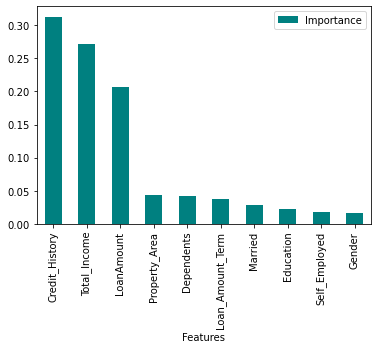

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x1=df.drop(columns=["Loan_Status"])
y=df['Loan_Status']

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
x1['Gender']= label_encoder.fit_transform(x1['Gender'])
x1['Married']= label_encoder.fit_transform(x1['Married'])
x1['Dependents']= label_encoder.fit_transform(x1['Dependents'])
x1['Education']= label_encoder.fit_transform(x1['Education'])
x1['Self_Employed']= label_encoder.fit_transform(x1['Self_Employed'])
x1['Property_Area']= label_encoder.fit_transform(x1['Property_Area'])

x_train, x_test,y_train, y_test=train_test_split(x1,y,test_size=.25,random_state=199)
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x1.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

# Encoding

In [33]:
#one hot encoding on data
df=pd.get_dummies(df)

#standardising the data for PCA
x=df.drop(columns=["Loan_Status"])
y=df['Loan_Status']

In [38]:
df

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4.993232,360.0,1.0,1,5849.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4.859812,360.0,1.0,0,6091.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,4.204693,360.0,1.0,1,3000.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,4.795791,360.0,1.0,1,4941.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,4.955827,360.0,1.0,1,6000.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,4.276666,360.0,1.0,1,2900.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,3.713572,180.0,1.0,1,4106.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,5.537334,360.0,1.0,1,8312.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,5.236442,360.0,1.0,1,7583.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


# Finding best random state

In [40]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

In [41]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.8636363636363636 on Random State 28


# Splitting data

In [42]:
 #splitting the data into train and test
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(x,y, train_size=0.8,random_state=28)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [43]:
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(491, 19)
(491,)
(61, 19)
(61,)
(62, 19)
(62,)


(None, None)

# Sampling the data to avoid over or underfitting

In [44]:

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [45]:
#handling imbalanced data through smote technique
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
oversample = SMOTE()
X_train_SMOTE, Y_train_SMOTE= oversample.fit_resample(X_train, Y_train)


In [46]:
print(Y_train_SMOTE)
print(X_train_SMOTE)

0      1
1      1
2      1
3      0
4      1
      ..
663    0
664    0
665    0
666    0
667    0
Name: Loan_Status, Length: 668, dtype: int32
     LoanAmount  Loan_Amount_Term  Credit_History  Total_Income  \
0      4.605170        360.000000        0.842199   5333.000000   
1      4.605170        360.000000        1.000000   3029.000000   
2      3.433987        360.000000        1.000000   2963.000000   
3      4.912655        360.000000        1.000000   3418.000000   
4      4.043051        360.000000        1.000000   2507.000000   
..          ...               ...             ...           ...   
663    4.961614        423.381266        0.528177   7707.535949   
664    4.498147        360.000000        0.575263   3567.709474   
665    4.318467        360.000000        0.874066   6939.620192   
666    4.692500        392.471755        1.000000   2340.260952   
667    4.331301        360.000000        0.771861   3809.524006   

     Gender_Female  Gender_Male  Married_No  Marrie

# Modelling

In [49]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
LR=LogisticRegression()

models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))
models.append(('LogisticRegression', LR))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.4838709677419355


Cross_Val_Score =  0.6380952380952382


roc_auc_score =  0.4431372549019607


classification_report
               precision    recall  f1-score   support

           0       0.22      0.35      0.27        17
           1       0.69      0.53      0.60        45

    accuracy                           0.48        62
   macro avg       0.45      0.44      0.44        62
weighted avg       0.56      0.48      0.51        62



[[ 6 11]
 [21 24]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeClassifier ********************************************************


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.6774193548387096


Cross_Val_Score =  0.719047619047619


roc_auc_score =  0.6496732026143792


classification_report

GradientBoostingClassifier()


Accuracy_score =  0.8709677419354839


Cross_Val_Score =  0.8523809523809524


roc_auc_score =  0.8379084967320259


classification_report
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.91      0.91      0.91        45

    accuracy                           0.87        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.87      0.87      0.87        62



[[13  4]
 [ 4 41]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** BaggingClassifier ********************************************************


BaggingClassifier()


Accuracy_score =  0.8870967741935484


Cross_Val_Score =  0.7357142857142858


roc_auc_score =  0.8673202614379084


classification_report
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.93      0.91      0.9

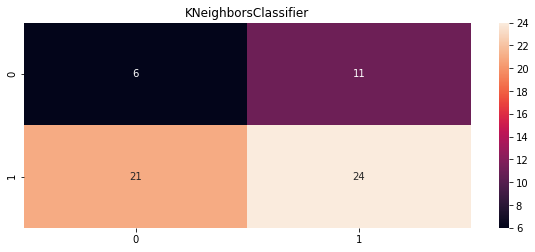

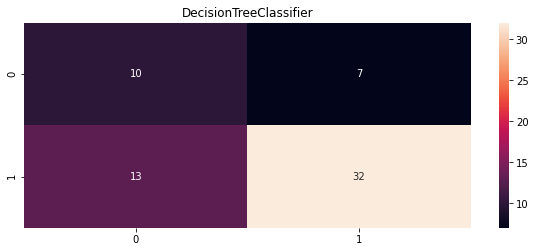

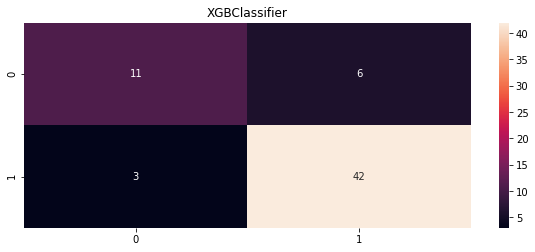

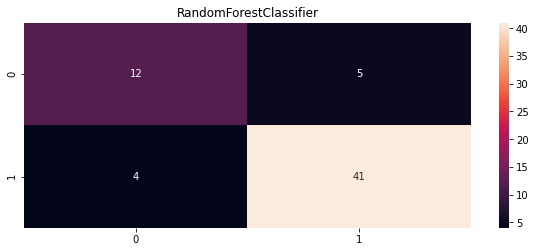

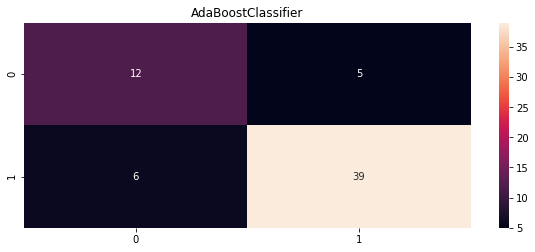

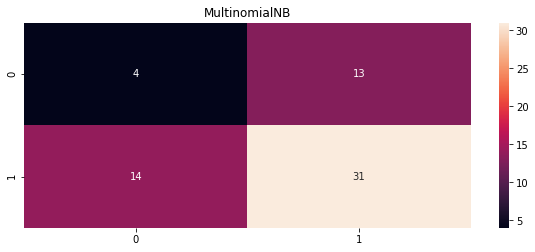

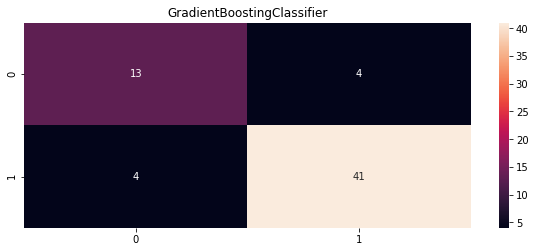

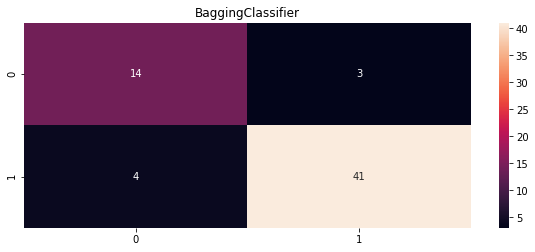

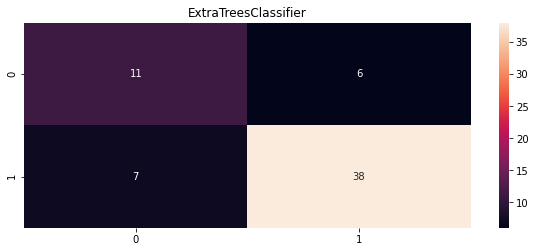

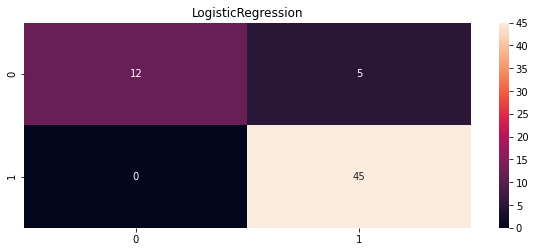

In [50]:
Model= []
score= []
cvs=[]
rocscore=[]
difference=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(X_train_SMOTE,Y_train_SMOTE)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    
    AS=accuracy_score(Y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    
    sc= cross_val_score(model, X_valid,Y_valid, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    
    
    false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    print('classification_report\n',classification_report(Y_test,pre))
    print('\n')
    
    cm=confusion_matrix(Y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')
    diff=AS-sc
    difference.append(diff)

In [51]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'difference between a and c':difference,'roc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,difference between a and c,roc_score
0,KNeighborsClassifier,48.387097,63.809524,-0.154224,44.313725
1,DecisionTreeClassifier,67.741935,71.904762,-0.041628,64.967320
2,XGBClassifier,85.483871,75.238095,0.102458,79.019608
3,RandomForestClassifier,85.483871,80.476190,0.050077,80.849673
4,AdaBoostClassifier,82.258065,73.571429,0.086866,78.627451
5,MultinomialNB,56.451613,59.285714,-0.028341,46.209150
6,GradientBoostingClassifier,87.096774,85.238095,0.018587,83.790850
7,BaggingClassifier,88.709677,73.571429,0.151382,86.732026
8,ExtraTreesClassifier,79.032258,77.142857,0.018894,74.575163
9,LogisticRegression,91.935484,73.571429,0.183641,85.294118


# ROC AUC curve

AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



[12:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)





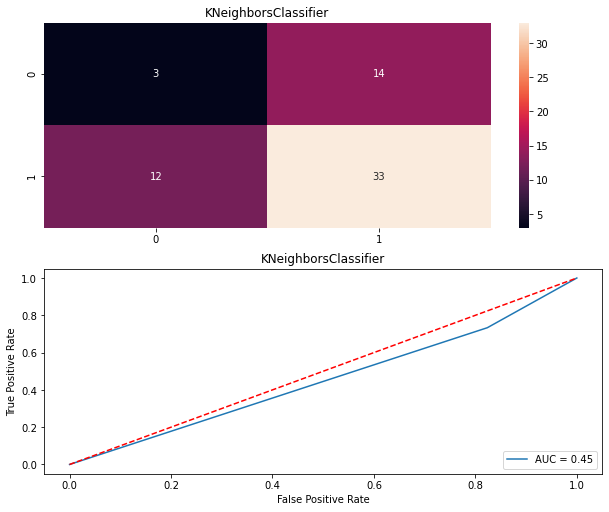

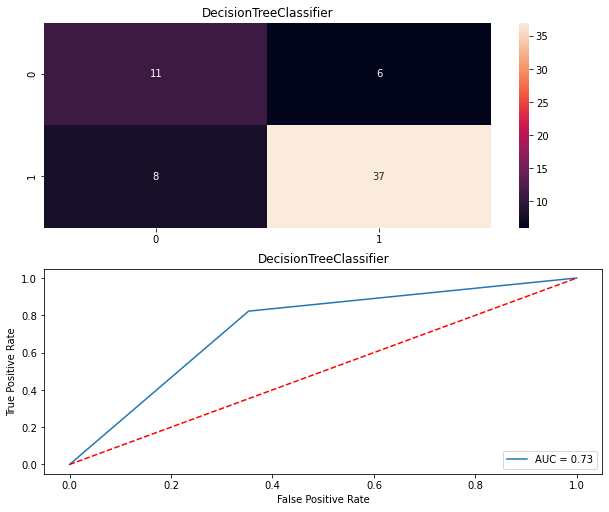

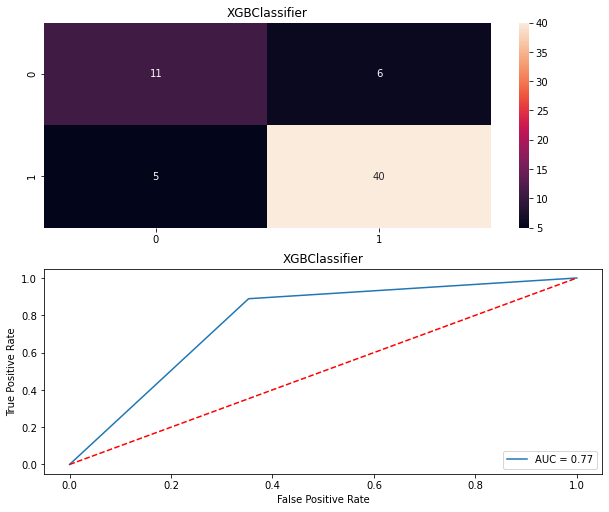

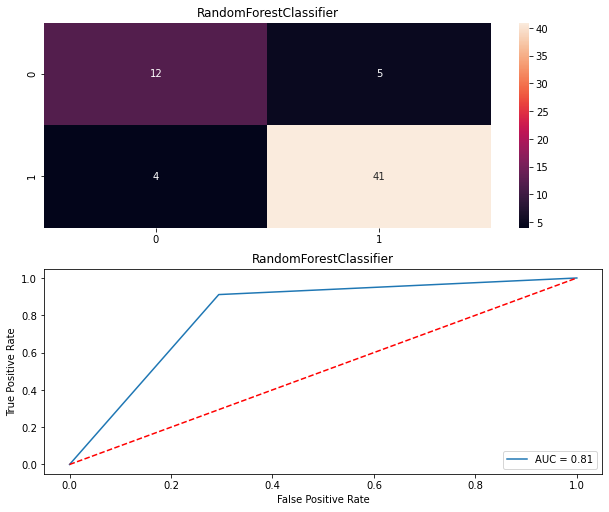

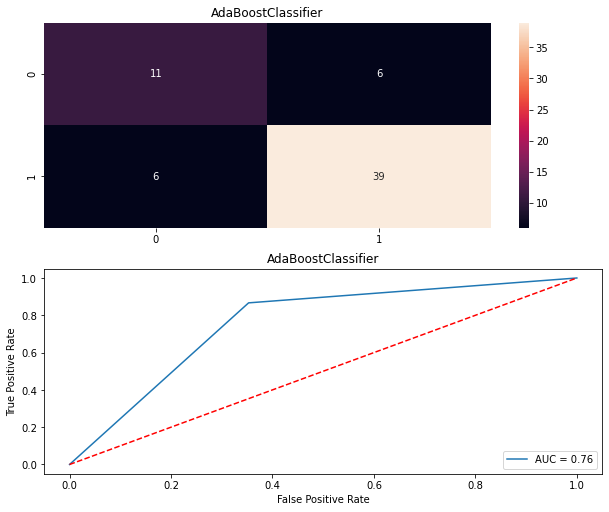

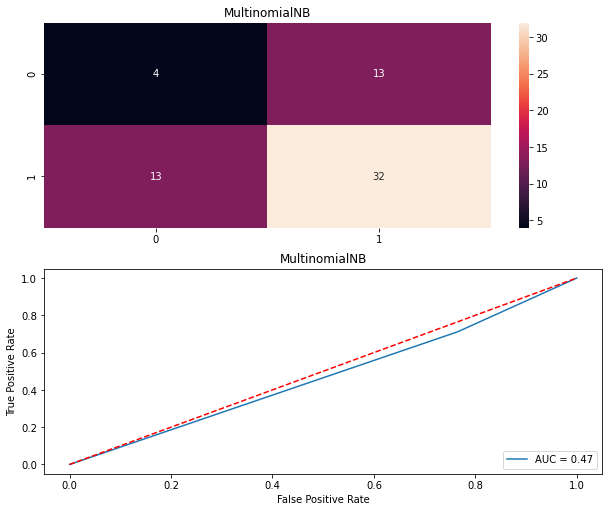

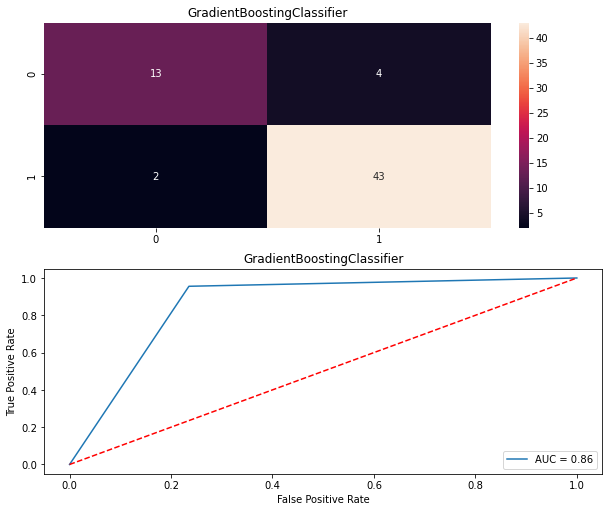

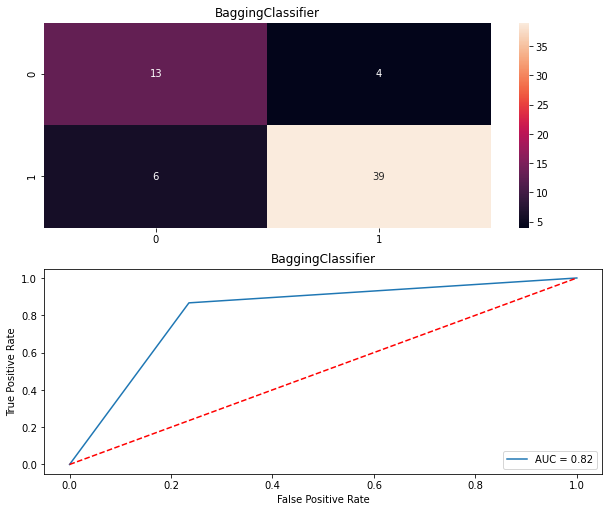

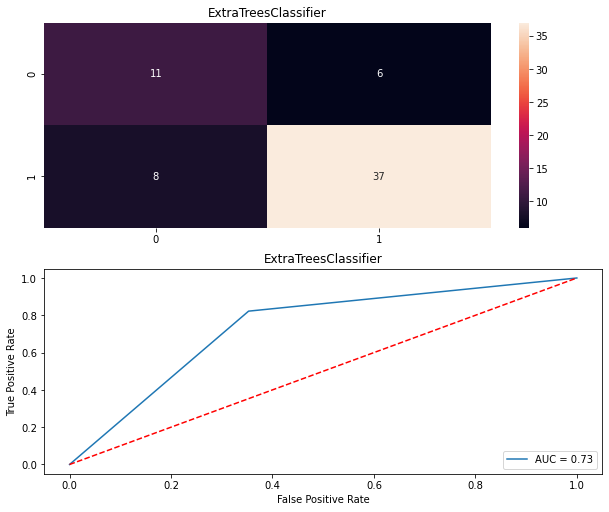

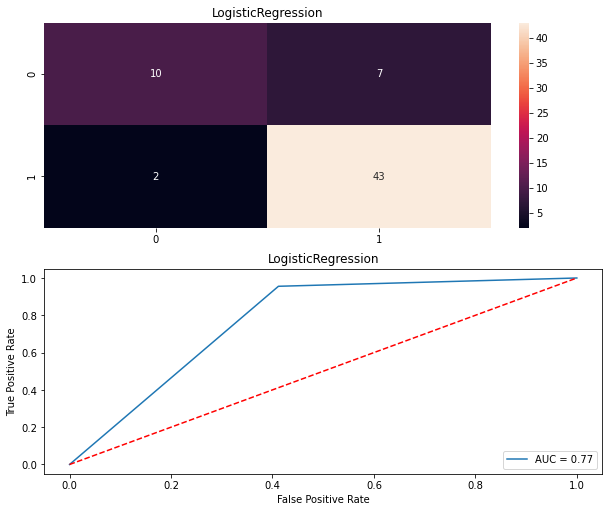

In [52]:
for name,model in models:
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)

    false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    
    cm= confusion_matrix(Y_test,pre)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# Best model chosen

Logistic regression shows the highest accuracy with the least difference with cross validation score. It also has a high ROC score

# Hyperparameter tuning

In [53]:
#from sklearn.linear_model import LogisticRegression

#Logistic Regression
paramters={'penalty':['l1', 'l2','elasticnet','none'],
           'dual':[True,False],
           'tol':[0.75,1],
           'C':[2,3,4,7],
           'intercept_scaling':[1.2,2.1],
           'class_weight':['dict','balanced'],
           'random_state':[2,3],
          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           }


GCV=GridSearchCV(LogisticRegression(),paramters,cv=6)

GCV.fit(X_train,Y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [2, 3, 4, 7],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'intercept_scaling': [1.2, 2.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [2, 3],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.75, 1]})

In [54]:
GCV.best_params_

{'C': 2,
 'class_weight': 'dict',
 'dual': False,
 'intercept_scaling': 1.2,
 'penalty': 'l2',
 'random_state': 2,
 'solver': 'newton-cg',
 'tol': 0.75}

In [55]:
Final_model=LogisticRegression(random_state=2,C=2,dual=False,intercept_scaling=1.2,penalty='l2',tol=0.75,class_weight='dict',solver='newton-cg')

In [58]:
#training
Final_model.fit(X_train,Y_train)

#predicting
pred=Final_model.predict(X_test)

#finding scores
Accuracy_Score_final=(accuracy_score(Y_test,pred))*100
cross_val_score_final= (cross_val_score(Final_model, X_test,Y_test, cv=10, scoring='accuracy').mean())*100
false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
roc_auc_final=auc(false_positive_rate,true_positive_rate)

#printing scores
print("Accuracy score of final model:",Accuracy_Score_final)
print("Cross validation score of final model:",cross_val_score_final)
print("ROC AUC score of final model:",roc_auc_final)

Accuracy score of final model: 88.70967741935483
Cross validation score of final model: 86.9047619047619
ROC AUC score of final model: 0.7718954248366013


In [59]:
#Making it a dataframe
score_final_model=[Accuracy_Score_final]
cvs_final_model=[cross_val_score_final]
rocscore_final_model=[roc_auc_final]

print("Score of the finalized model:")
final_model_scores=data = pd.DataFrame({'Accuracy score':score_final_model,'cross validation score':cvs_final_model,'ROC Score':rocscore_final_model})

from IPython.display import HTML
HTML(final_model_scores.to_html(index=False))

Score of the finalized model:


Accuracy score,cross validation score,ROC Score
88.709677,86.904762,0.771895


In [61]:
#CLASSIFICATION MATRIX
print('classification_report\n',classification_report(Y_test,pred))

classification_report
               precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.88      0.98      0.93        45

    accuracy                           0.89        62
   macro avg       0.90      0.81      0.84        62
weighted avg       0.89      0.89      0.88        62



# Saving of model

In [60]:
filename='finalized_model.pickle'
pickle.dump(Final_model,open(filename,'wb'))

-------------------------------------------------------------------------------------MODEL BUILT----------------------------------------------------------------